## Noah Pishaki - Physics 490 - Assignment 4

In [626]:
import numpy as np
import matplotlib.pyplot as plt

### 1.) Produce a table of $x_i$ and $e^{\sin(2x_i)}$ values, where $x_i$ goes from 0 to 1.6 in steps of 0.08.

In [627]:
h=0.08                                #assign the stepsize
x_i = np.arange(0, 1.60+h, h)         #define the domain

def fct(x):                           #define primary function
    return np.exp(np.sin(2*x))

def fct_prime(x):
    return 2*np.exp(np.sin(2*x))*np.cos(2*x)

def forward_diff (f, x, h):           #define forward-difference function
    return ((f(x+h) - f(x)) / h)

def central_diff (f, x, h):           #define central-difference function
    return ((f(x+h) - f(x-h)) / (2*h))


#calling functions
exact = fct_prime(x_i)
fwd_diff = forward_diff(fct, x_i, h)
cnt_diff = central_diff(fct, x_i, h)


#printing table
print("x | y" )          
for a,b in zip(x_i, exact):
    print(a,b)

x | y
0.0 2.0
0.08 2.315464691565164
0.16 2.6002700361015996
0.24 2.815135330954731
0.32 2.9148412030979833
0.4 2.855116148159658
0.48 2.602249478836156
0.56 2.1434270803467133
0.64 1.494657650108811
0.72 0.7030260715081494
0.8 -0.15867738776006846
0.88 -1.004406495734087
0.96 -1.7511725516526966
1.04 -2.334454996550078
1.12 -2.7183100439950376
1.2 -2.897873074838455
1.28 -2.8947071151078316
1.36 -2.747596708123946
1.44 -2.5021582751216456
1.52 -2.202065385836738
1.6 -1.8833768405066684


Calculating error:

In [628]:
fwd_max_error = max(abs(exact - fwd_diff))
cnt_max_error = max(abs(exact - cnt_diff))
print('Forward Difference maximum error: ', fwd_max_error)
print('Central Difference maximum error: ', cnt_max_error)

Forward Difference maximum error:  0.42851462234447146
Central Difference maximum error:  0.03448997077410798


### a. Plot the forward-difference and central-difference results (for the first derivative) given these values. Then, introduce a curve for the analytical derivative.
###### (Hint: if you cannot produce a result for a specific $x$, don’t.) 


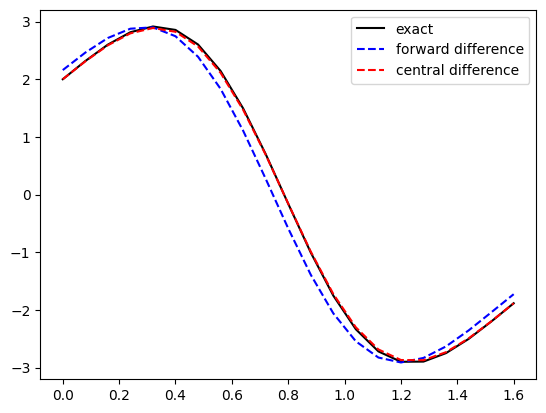

In [629]:
plt.plot(x_i,exact, 'k', label='exact')
plt.plot(x_i,fwd_diff, '--b', label='forward difference')
plt.plot(x_i,cnt_diff, '--r', label='central difference')
plt.legend()
plt.show()

### b. Use Richardson extrapolation for the forward difference for points on a grid and add an extra set of points to the plot. 
### You can use: $ R_{fd} = 2D_{fd}(h) - D_{fd}(2h) + O(h^2) $

In [630]:
if __name__ == '__main__':
    analytical = fct_prime(x_i) # Analytical result

    hs = [10**(-i) for i in range(1,10)]

    for h in hs:
        fwd_rich = 2*forward_diff(fct, x_i, h) - forward_diff(fct, x_i, 2*h) # forward-difference Richardson
        max_error = max(abs(fwd_rich-analytical)) 
        print("h= ", h, " | fwd diff max error=", format(max_error,".8f"))
        


h=  0.1  | fwd diff max error= 0.10687793
h=  0.01  | fwd diff max error= 0.00108461
h=  0.001  | fwd diff max error= 0.00001086
h=  0.0001  | fwd diff max error= 0.00000011
h=  1e-05  | fwd diff max error= 0.00000000
h=  1e-06  | fwd diff max error= 0.00000000
h=  1e-07  | fwd diff max error= 0.00000001
h=  1e-08  | fwd diff max error= 0.00000010
h=  1e-09  | fwd diff max error= 0.00000094


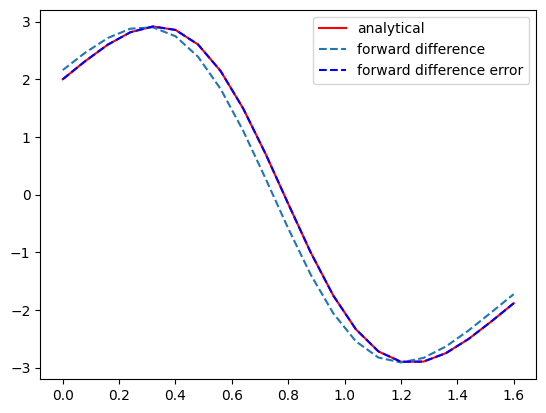

In [631]:
plt.plot(x_i,analytical, 'r', label='analytical')
plt.plot(x_i,fwd_diff, "--" , label='forward difference')
plt.plot(x_i, fwd_rich, '--b', label='forward difference error')
plt.legend()
plt.show()

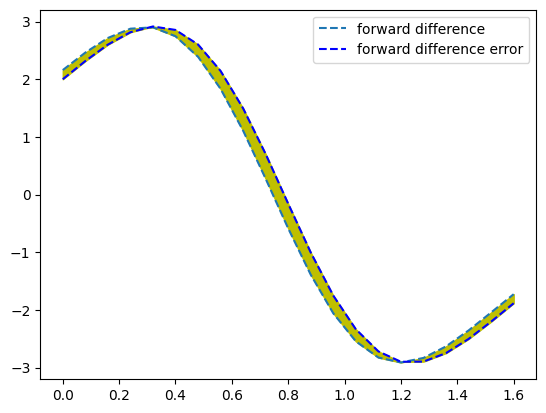

In [632]:
plt.plot(x_i,fwd_diff, "--" , label='forward difference')
plt.plot(x_i, fwd_rich, '--b', label='forward difference error')
plt.fill_between(x_i, fwd_diff, fwd_rich, color='y', interpolate=True)
plt.legend()
plt.show()

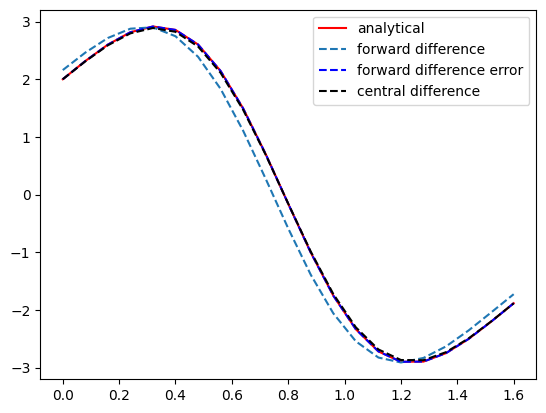

In [633]:
plt.plot(x_i,analytical, 'r', label='analytical')
plt.plot(x_i,fwd_diff, "--" , label='forward difference')
plt.plot(x_i, fwd_rich, '--b', label='forward difference error')
plt.plot(x_i,cnt_diff, '--k', label='central difference')
plt.legend()
plt.show()